In [1]:
import sqlite3
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Load calls from db

# Set a fixed number of calls per species, or set to 0 to include all calls
num_calls = 600

# Select specific species for classification
targets = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18] # Großer Abendsegler - Nyctalus noctula, Zwergfledermaus - Pipistrellus pipistrellus
db_path = 'batcallsv14.db'
all_rows = []

def _convert_array(text):
	out = io.BytesIO(text)
	out.seek(0)
	return np.load(out, allow_pickle=True)
def _adapt_array(arr):
	out = io.BytesIO()
	np.save(out, arr)
	out.seek(0)
	return sqlite3.Binary(out.read())

sqlite3.register_adapter(np.ndarray, _adapt_array)
sqlite3.register_converter("ARRAY", _convert_array)

query = "SELECT arr,target FROM batcalls"
conn = sqlite3.connect(db_path, detect_types=True)
df = pd.read_sql_query(query, conn)
df

,arr,target
0,"[157, 109, -92, -126, -10, 40, 11, -41, 45, 21...",0
1,"[-487, -92, 334, 561, 530, 229, -180, -511, -5...",0
2,"[-5, 120, 23, -22, 47, 15, -117, -154, -146, -...",0
3,"[-189, -179, -79, 34, 95, 37, -7, 35, 30, 26, ...",0
4,"[1, 0, -1, 0, 2, 5, 6, 7, 6, 5, 1, -4, -6, -9,...",0
...,...,...
51714,"[3, 91, 32, -82, -77, -37, -20, -2, 66, 30, -6...",18
51715,"[-14, 64, 27, -17, 22, 12, -8, 16, 13, 9, 10, ...",18
51716,"[-27, 92, 54, -27, 14, 10, -16, 13, 64, 33, -5...",18
51717,"[61, 80, 86, -33, -87, 29, 11, -26, 40, 70, 90...",18


In [2]:

#Connect to SQLite database
conn = sqlite3.connect('batcallsv14.db')
cursor = conn.cursor()

query = "SELECT arr,target FROM batcalls"

df = pd.read_sql_query(query, conn)

#Close the connection
conn.close()


def convert_to_array(binary_data):
    return np.frombuffer(binary_data, dtype=np.int16)

df['SpectrogramData'] = df['arr'].apply(convert_to_array)
df = df.drop('arr', axis=1)
df_spectrogram = df['SpectrogramData'].apply(pd.Series)

#Concatenate the split columns with the original DataFrame
df = pd.concat([df, df_spectrogram], axis= 1).drop('SpectrogramData', axis = 1)

#ungefähr 470 zeilen mit doppelter SpaltenZahl mit target = 12
df


,target,0,1,2,3,4,5,6,7,8,...,8874,8875,8876,8877,8878,8879,8880,8881,8882,8883
0,0,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51714,18,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51715,18,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51716,18,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51717,18,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Überprüfe die Verteilung
print(df.groupby('target').size())
df_small = df.groupby('target').head(500).reset_index(drop=True)
df_medium = df.groupby('target').head(3000).reset_index(drop=True)
print(df_small.groupby('target').size())

target
0     2393
1      329
2     2681
3     3040
4     3005
5     2366
6     2884
7      411
8      327
9      566
10    1245
11    4695
12    4713
13    2142
14    6074
15    4619
16     849
17    1495
18    7885
dtype: int64
target
0     500
1     329
2     500
3     500
4     500
5     500
6     500
7     411
8     327
9     500
10    500
11    500
12    500
13    500
14    500
15    500
16    500
17    500
18    500
dtype: int64


In [4]:
#ForFun LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix

df_logreg = df_small.iloc[:,:4475]
Inputs_logreg = df_logreg.drop(columns=['target'])
Target_logreg = df_logreg['target']

X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(Inputs_logreg, Target_logreg, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train_logreg = scaler.fit_transform(X_train_logreg)
#X_test_logreg = scaler.transform(X_test_logreg)

logistic_reg=LogisticRegression(); # Modell spezifizieren
logistic_reg.fit(X_train_logreg,y_train_logreg); # Modell fitten - Trainingsmenge
print(logistic_reg.score(X_train_logreg,y_train_logreg)) # Trainingsmenge
print(logistic_reg.score(X_test_logreg,y_test_logreg)) # Testmenge

0.5673514407831243
0.26019845644983464


/home/sebastian/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
#ForFun LDA
df_lda = df_small.iloc[:,:4475]
Inputs = df_lda.drop(columns=['target'])
Target = df_lda['target']

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(Inputs, Target, test_size=0.2, shuffle=True)

from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train_lda = scaler.fit_transform(X_train_lda)
#X_test_lda = scaler.transform(X_test_lda)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train_lda, y_train_lda)
                                
print(lda.score(X_train_lda, y_train_lda))
print(lda.score(X_test_lda, y_test_lda))                   

0.945815524610506
0.22105843439911796


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
Maximum Testscore  0.4699471719317364  bei  1


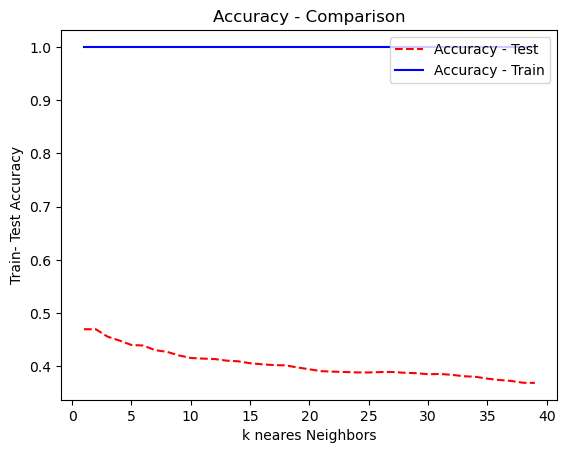

In [5]:
#KNN Klassifikator
from sklearn import neighbors
from sklearn.model_selection import cross_val_score, cross_validate

df_knn = df_small.iloc[:,:4475]
Inputs_knn = df_knn.drop(columns=['target'])
Target_knn = df_knn['target']

#X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(Inputs_knn, Target_knn, test_size=0.2)
#scaler = MinMaxScaler()
#X_train_knn = scaler.fit_transform(X_train_knn)
#X_test_knn = scaler.transform(X_test_knn)

testrange = range(1,40)
mean_train_scores_knn = []
mean_test_scores_knn = []
for i in testrange:
    n_neighbors = i
    bestknn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    scores_knn = cross_validate(bestknn, Inputs_knn, Target_knn, cv=5, scoring='accuracy', return_train_score=True) #F1-Score?
    mean_train_scores_knn.append(np.mean(scores_knn['train_score']))
    mean_test_scores_knn.append(np.mean(scores_knn['test_score']))

plt.plot(testrange,mean_test_scores_knn,'r--',label='Accuracy - Test');
plt.plot(testrange,mean_train_scores_knn,'b-',label='Accuracy - Train');

plt.xlabel('k neares Neighbors')
plt.ylabel('Train- Test Accuracy') 
plt.title('Accuracy - Comparison')
plt.legend(loc='upper right');
max_score_index_knn = np.argmax(mean_test_scores_knn)
print("Maximum Testscore ", mean_test_scores_knn[max_score_index_knn], " bei ", max_score_index_knn+1)

In [6]:
df_knn = df_medium.iloc[:,:4475]
Inputs_knn = df_knn.drop(columns=['target'])
Target_knn = df_knn['target']

bestknn = neighbors.KNeighborsClassifier(max_score_index_knn+1, weights='distance')
scores_knn = cross_validate(bestknn, Inputs_knn, Target_knn, cv=5, scoring='accuracy', return_train_score=True)
print('Das beste Ergebniss liegt bei ', max_score_index_knn+1, ' und hat einen Trainscore von ', np.mean(scores_knn['train_score']), ' und einen Testscore von ', np.mean(scores_knn['test_score']))

Das beste Ergebniss liegt bei  1  und hat einen Trainscore von  1.0  und einen Testscore von  0.49811305387808485


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
Maximum Testscore  0.3430019989163161  bei  33


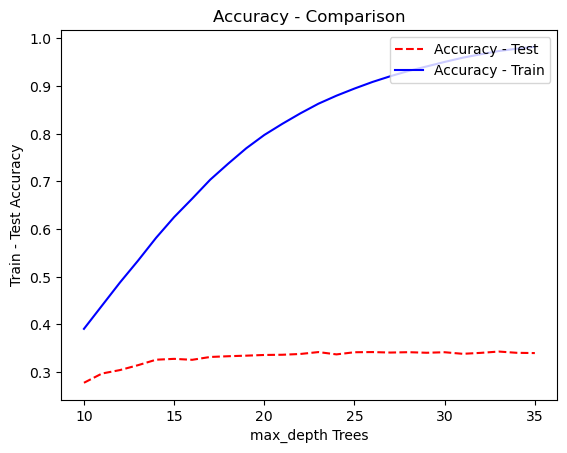

In [7]:
#Classification Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

df_dt = df_small.iloc[:,:4475]
Inputs_dt = df_dt.drop(columns=['target'])
Target_dt = df_dt['target']

#X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(Inputs_dt, Target_dt, test_size=0.2)
#scaler = MinMaxScaler()
#X_train_dt = scaler.fit_transform(X_train_dt)
#X_test_dt = scaler.transform(X_test_dt)

testrange = range(10,36)
mean_train_scores_dt = []
mean_test_scores_dt = []
for i in testrange:
    print(i)
    test_depth = i
    decision_tree = DecisionTreeClassifier(max_depth=test_depth, criterion='gini')
    scores_dt = cross_validate(decision_tree, Inputs_dt, Target_dt, cv=5, scoring='accuracy', return_train_score=True) #F1-Score?
    mean_train_scores_dt.append(np.mean(scores_dt['train_score']))
    mean_test_scores_dt.append(np.mean(scores_dt['test_score']))

plt.plot(testrange,mean_test_scores_dt,'r--',label='Accuracy - Test');
plt.plot(testrange,mean_train_scores_dt,'b-',label='Accuracy - Train');

plt.xlabel('max_depth Trees')
plt.ylabel('Train - Test Accuracy') 
plt.title('Accuracy - Comparison')
plt.legend(loc='upper right');
max_score_index_dt = np.argmax(mean_test_scores_dt)
print("Maximum Testscore ", mean_test_scores_dt[max_score_index_dt], " bei ", max_score_index_dt+10)

In [10]:
#Bagging, Random Forest & Boosting
#Bagging
from sklearn.tree import DecisionTreeClassifier
df_bag = df_small.iloc[:,:4475]
Inputs_bag = df_bag.drop(columns=['target'])
Target_bag = df_bag['target']

X_train_bag, X_test_bag, y_train_bag, y_test_bag = train_test_split(Inputs_bag, Target_bag, test_size=0.2)
scaler = MinMaxScaler() 
X_train_bag = scaler.fit_transform(X_train_bag)
X_test_bag = scaler.transform(X_test_bag)

from sklearn.ensemble import BaggingClassifier
from joblib import Parallel, delayed
testrange = range(30, 101)
test_scores_bag = []
train_scores_bag = []

# Funktion zur Berechnung der Scores für einen gegebenen Wert von i
def compute_scores(i):
    bagclas = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=i, random_state=0, bootstrap=True)
    bagclas.fit(X_train_bag,y_train_bag)
    test_score = bagclas.score(y_test_bag)
    train_score = bagclas.score(y_train_bag)
    return test_score, train_score

# Parallele Ausführung
num_jobs = -1  # Verwende alle verfügbaren Kerne
results = Parallel(n_jobs=num_jobs)(
    delayed(compute_scores)(i) for i in testrange
)
# Ergebnisse in separate Listen aufteilen
test_scores_bag = [result[0] for result in results]
train_scores_bag = [result[1] for result in results]

plt.plot(testrange,test_scores_bag,'r--',label='Accuracy - Test');
plt.plot(testrange,train_scores_bag,'b-',label='Accuracy - Train');

plt.xlabel('n_estimators')
plt.ylabel('Test Accuracy') 
plt.title('Accuracy - Comparison')
plt.legend(loc='upper right')
max_score_index_bag = np.argmax(test_scores_bag)
print("Maximum Testscore ", test_scores_bag[max_score_index_bag], " bei ", max_score_index_bag+30, " n_estimators")

KeyboardInterrupt: 

In [13]:
#Test auf vollem df
df_bag = df_medium.iloc[:,:4475]
Inputs_bag = df_bag.drop(columns=['target'])
Target_bag = df_bag['target']

X_train_bag, X_test_bag, y_train_bag, y_test_bag = train_test_split(Inputs_bag, Target_bag, test_size=0.2)
scaler = MinMaxScaler() 
X_train_bag = scaler.fit_transform(X_train_bag)
X_test_bag = scaler.transform(X_test_bag)

bagclas = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=max_score_index_bag+30, random_state=0, bootstrap=True)
bagclas.fit(X_train_bag,y_train_bag)
print('Mit einer Anzahl von ', max_score_index_bag+30, ' Estimators bekommt man folgende Ergebnisse...')
print('Final Testscore: ', bagclas.score(X_test_bag,y_test_bag), ' & Final Trainscore: ', bagclas.score(X_train_bag,y_train_bag))

Mit einer Anzahl von  40  Estimators bekommt man folgende Ergebnisse...
Final Testscore:  0.5435513052468338  & Final Trainscore:  1.0


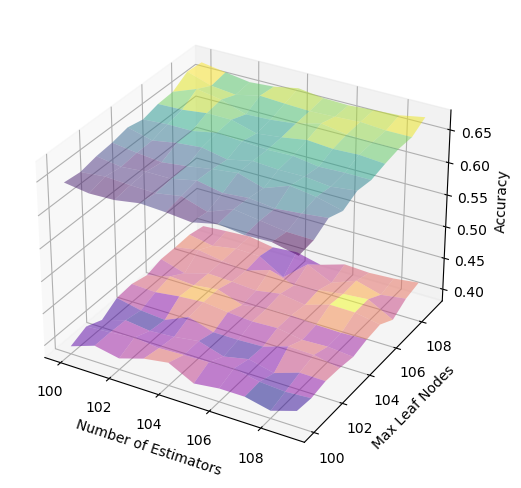

Best n_estimators:  105
Best max_leaf_nodes:  108
Max Test Score Value:  0.4195148842337376
-> 0.40683572216097025
-> 0.4079382579933848
-> 0.40683572216097025
-> 0.41565600882028664
-> 0.40628445424476295
100  est & leaf  102
-> 0.40904079382579933
101  est & leaf  104
-> 0.40959206174200663
103  est & leaf  102
-> 0.40683572216097025
104  est & leaf  104
-> 0.42282249173098124
100  est & leaf  100
-> 0.39305402425578834
100  est & leaf  108
-> 0.4117971334068357
102  est & leaf  100
-> 0.3985667034178611
102  est & leaf  107
-> 0.41069459757442117
103  est & leaf  105
-> 0.41620727673649394
104  est & leaf  104
-> 0.4117971334068357
105  est & leaf  102
-> 0.3958103638368247
106  est & leaf  100
-> 0.4018743109151047
106  est & leaf  107
-> 0.40959206174200663
107  est & leaf  107
-> 0.4151047409040794
108  est & leaf  105
-> 0.40628445424476295
109  est & leaf  104
-> 0.4018743109151047
-> 0.40959206174200663
-> 0.40683572216097025
-> 0.386438809261301
-> 0.4084895259095921
-> 0.408

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from joblib import Parallel, delayed

df_rf = df_small.iloc[:, :4475]
Inputs_rf = df_rf.drop(columns=['target'])
Target_rf = df_rf['target']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(Inputs_rf, Target_rf, test_size=0.2)
scaler = MinMaxScaler() 
X_train_rf = scaler.fit_transform(X_train_rf)
X_test_rf = scaler.transform(X_test_rf)

testrange_esti = range(100, 110)
testrange_max_leaf = range(100, 110)

# Parallele Berechnung der Scores
def compute_scores(j, i):
    rfclass = RandomForestClassifier(n_estimators=j, max_leaf_nodes=i)
    rfclass.fit(X_train_rf,y_train_rf)
    train_score = rfclass.score(X_train_rf,y_train_rf)
    test_score = rfclass.score(X_test_rf,y_test_rf)
    return train_score, test_score

# Parallele Ausführung
num_jobs = -1  # Verwende alle verfügbaren Kerne
results = Parallel(n_jobs=num_jobs)(
    delayed(compute_scores)(j, i) for j in testrange_esti for i in testrange_max_leaf
)

# Ergebnisse in separate Listen aufteilen
mean_train_scores_rf_2d = np.array([result[0] for result in results]).reshape(len(testrange_esti), len(testrange_max_leaf))
mean_test_scores_rf_2d = np.array([result[1] for result in results]).reshape(len(testrange_esti), len(testrange_max_leaf))

# 3D-Plot erstellen
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
estimators_mesh, leaf_nodes_mesh = np.meshgrid(testrange_esti, testrange_max_leaf)

# Plot der Trainingsgenauigkeit
ax.plot_surface(estimators_mesh, leaf_nodes_mesh, mean_train_scores_rf_2d.T, cmap='viridis', alpha=0.5, label='Train Score')
# Plot der Testgenauigkeit
ax.plot_surface(estimators_mesh, leaf_nodes_mesh, mean_test_scores_rf_2d.T, cmap='plasma', alpha=0.5, label='Test Score')

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Leaf Nodes')
ax.set_zlabel('Accuracy')


plt.show()

# Index des maximalen Testscores
max_test_score_index = np.unravel_index(np.argmax(mean_test_scores_rf_2d), mean_test_scores_rf_2d.shape)
max_test_score_value = mean_test_scores_rf_2d[max_test_score_index]

# Finde den zweidimensionalen Index mit dem maximalen Testscore
max_test_score_index = np.unravel_index(np.argmax(mean_test_scores_rf_2d), mean_test_scores_rf_2d.shape)
best_n_estimators_rf = list(testrange_esti)[max_test_score_index[0]]
best_max_leaf_nodes_rf = list(testrange_max_leaf)[max_test_score_index[1]]

print('Best n_estimators: ', best_n_estimators_rf)
print('Best max_leaf_nodes: ', best_max_leaf_nodes_rf)
print('Max Test Score Value: ', max_test_score_value)

In [ ]:
df_rf = df_medium.iloc[:, :4475]
Inputs_rf = df_rf.drop(columns=['target'])
Target_rf = df_rf['target']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(Inputs_rf, Target_rf, test_size=0.2)
scaler = MinMaxScaler() 
X_train_rf = scaler.fit_transform(X_train_rf)
X_test_rf = scaler.transform(X_test_rf)

rfclass = RandomForestClassifier(n_estimators=best_n_estimators_rf, max_leaf_nodes=best_max_leaf_nodes_rf)
rfclass.fit(X_train_rf)

print('Mit einer Anzahl von ', best_n_estimators_rf, ' n_estimators und ', best_max_leaf_nodes_rf' max_leaf_nodes bekommt man folgende Ergebnisse...')
print('Final Testscore: ',rfclass.score(X_test_rf,y_test_rf), ' & Final Trainscore: ', rfclass.score(X_train_rf,y_train_rf)

-> 0.36108048511576624
-> 0.3484013230429989
-> 0.34178610804851156
-> 0.35226019845644985
-> 0.3395810363836825
-> 0.33572216097023155
-> 0.35170893054024255
-> 0.34564498346196254
-> 0.3461962513781698
-> 0.36934950385887544
-> 0.34454244762954794
-> 0.34895259095920617
-> 0.3533627342888644
-> 0.350606394707828


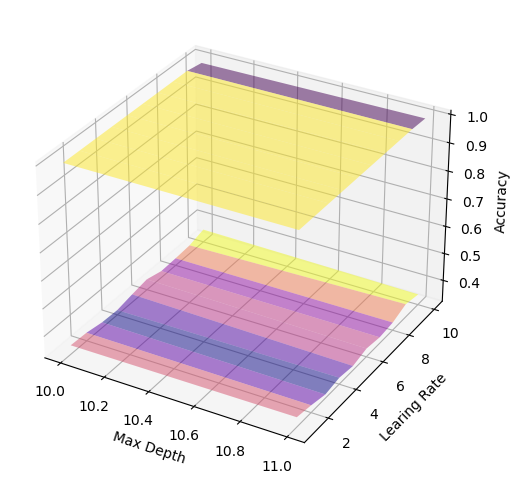

NameError: name 'testrange_learning_rate' is not defined

-> 0.3511576626240353
-> 0.3577728776185226
-> 0.3710033076074972
-> 0.35446527012127893
-> 0.33792723263506064
-> 0.360529217199559


In [26]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier

ada_df = df_small.iloc[:, :4475]
Inputs_ada = ada_df.drop(columns=['target'])
Target_ada = ada_df['target']

X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(Inputs_ada, Target_ada, test_size=0.2)
scaler = MinMaxScaler() 
X_train_ada = scaler.fit_transform(X_train_ada)
X_test_ada = scaler.transform(X_test_ada)

testrange_learning_rate_ada = range(1,11)
testrange_max_depth_ada = range(10,12)

test_scores_ada = []
train_scores_ada = []

# Parallele Berechnung der Scores
def compute_scores(j, i):
    adaBoost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=j), n_estimators=best_n_estimators_rf, learning_rate=i/10)
    adaBoost.fit(X_train_ada, y_train_ada)
    train_score = adaBoost.score(X_train_ada,y_train_ada)
    test_score = adaBoost.score(X_test_ada,y_test_ada)
    print('->', test_score)
    return train_score, test_score

# Parallele Ausführung
num_jobs = -1  # Verwende alle verfügbaren Kerne
results = Parallel(n_jobs=num_jobs)(
    delayed(compute_scores)(j, i) for j in testrange_max_depth_ada for i in testrange_learning_rate_ada
)

# Ergebnisse in separate Listen aufteilen
mean_train_scores_ada_2d = np.array([result[0] for result in results]).reshape(len(testrange_max_depth_ada), len(testrange_learning_rate_ada))
mean_test_scores_ada_2d = np.array([result[1] for result in results]).reshape(len(testrange_max_depth_ada), len(testrange_learning_rate_ada))

# 3D-Plot erstellen
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
max_depth_mesh, learning_rate_mesh = np.meshgrid(testrange_max_depth_ada, testrange_learning_rate_ada)

# Plot der Trainingsgenauigkeit
ax.plot_surface(max_depth_mesh, learning_rate_mesh, mean_train_scores_ada_2d.T, cmap='viridis', alpha=0.5, label='Train Score')
# Plot der Testgenauigkeit
ax.plot_surface(max_depth_mesh, learning_rate_mesh, mean_test_scores_ada_2d.T, cmap='plasma', alpha=0.5, label='Test Score')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Learing Rate')
ax.set_zlabel('Accuracy')


plt.show()

# Index des maximalen Testscores
max_test_score_index_ada = np.unravel_index(np.argmax(mean_test_scores_ada_2d), mean_test_scores_ada_2d.shape)
max_test_score_value_ada = mean_test_scores_ada_2d[max_test_score_index_ada]

# Finde den zweidimensionalen Index mit dem maximalen Testscore
max_test_score_index_ada = np.unravel_index(np.argmax(mean_test_scores_ada_2d), mean_test_scores_ada_2d.shape)
best_max_depth_ada = list(testrange_max_depth_ada)[max_test_score_index_ada[0]]
best_learning_rate_ada = list(testrange_learning_rate_ada)[max_test_score_index_ada[1]]

print('Best max_depth: ', best_max_depth_ada)
print('Best learning_rate: ', best_learning_rate_ada)
print('Max Test Score Value: ', max_test_score_value_ada)

In [ ]:
df_ada = df.iloc[:, :4475]
Inputs_ada = df_ada.drop(columns=['target'])
Target_ada = df_ada['target']

X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(Inputs_ada, Target_ada, test_size=0.2)
scaler = MinMaxScaler() 
X_train_ada = scaler.fit_transform(X_train_ada)
X_test_ada = scaler.transform(X_test_ada)

adaBoostClass = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=best_max_depth_ada), n_estimators=best_n_estimators_rf, learning_rate=best_learning_rate_ada)
adaBoostClass.fit(X_train_ada,y_train_ada)

print('Mit einer Anzahl von ', best_n_estimators_rf, ' n_estimators, ', best_max_depth_ada,' max_depth und ', best_learning_rate_ada, ' learning_rate bekommt man folgende Ergebnisse...')
print('Final Testscore: ', adaBoostClass.score(X_test_ada,y_test_ada), ' & Final Trainscore: ', adaBoostClass.score(X_train_ada,y_train_ada))